In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import random
from scipy import constants
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import json
import bilby
import os
from copy import deepcopy

from bilby.core.prior import Uniform, Constraint, Sine, PowerLaw,Cosine, LogUniform

# Gen BBHs

In [18]:
Priors=bilby.gw.prior.BBHPriorDict()
Priors['chirp_mass'] = Uniform(minimum=3, maximum=250, name='chirp_mass', latex_label='$\\mathcal{M}$', unit='$M_{\\odot}$', boundary=None)
Priors['mass_ratio'] = Uniform(minimum=0.05, maximum=1.0, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
Priors['mass_1'] = Constraint(minimum=5, maximum=250, name='mass_1', latex_label='$m_1$', unit=None)
Priors['mass_2'] = Constraint(minimum=5, maximum=250, name='mass_2', latex_label='$m_2$', unit=None)
Priors['snr_ul'] = LogUniform( minimum=4, maximum=30, name='snr_ul')
Priors['snr_img1'] = PowerLaw(alpha=-1, minimum=4, maximum=30, name='snr_img1')
Priors['snr_img2'] = PowerLaw(alpha=-1, minimum=4, maximum=30, name='snr_img2')
# standard should be the SNR of the weaker signal!

12:14 bilby INFO    : No prior given, using default BBH priors in /home/srashti.goyal/.conda/envs/tensorflowenvpy39/lib/python3.9/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.


#####  Multi-detector

3 detectors. In some cases only 2 are online.

Event to be detected: SNR>4 in atleast 2 detectors.
d_I=(d1_I,d2_I) pair of signals in Ith detector.

CNN -- a classifier for a single detector pair of signals, and is agnostic about I.

Ith pair of signal --> Ith statistic


Statistic--> False alarm probability. (Any detector combination).

Multi-detector statistic: Sum_I(Ith statistic * Ith SNR)/Sum_I(Ith SNR) (Any detector combination)



In [12]:
n=int(1e5)

In [13]:
samples=Priors.sample(size=n)

In [14]:
samples_bbh = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters(samples)[0]
time_array = np.arange(1238112018, 1269302418, 0.1) # period of O3
samples_bbh['geocent_time'] = np.random.choice(time_array, size = n)

samples_bbh['geocent_time_img1'] = np.random.choice(time_array, size = n)

samples_bbh['geocent_time_img2'] = np.random.choice(time_array, size = n)


In [15]:
samples_bbh=pd.DataFrame(samples_bbh)

(array([10053., 10243., 10029.,  9883., 10205.,  9932.,  9874.,  9816.,
         9861., 10104.]),
 array([1.38630552, 1.58779388, 1.78928224, 1.9907706 , 2.19225896,
        2.39374732, 2.59523567, 2.79672403, 2.99821239, 3.19970075,
        3.40118911]),
 <BarContainer object of 10 artists>)

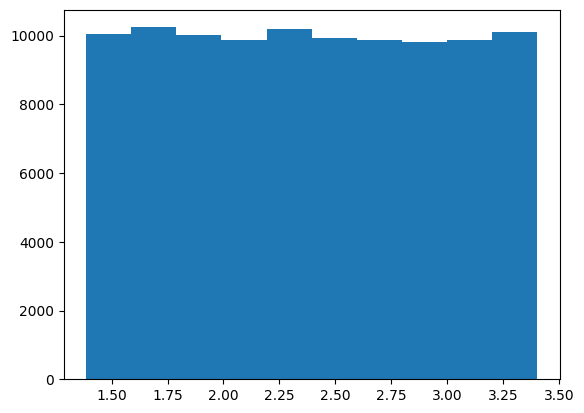

In [23]:
plt.hist(np.log(samples_bbh['snr_img1']),cumulative=0)

(array([0.59013454, 0.37496579, 0.17280235, 0.09370384, 0.05739565,
        0.03595263, 0.0215114 , 0.01252667, 0.00652317, 0.00202396]),
 array([0.13356065, 0.86480069, 1.59604073, 2.32728077, 3.05852081,
        3.78976084, 4.52100088, 5.25224092, 5.98348096, 6.714721  ,
        7.44596103]),
 <BarContainer object of 10 artists>)

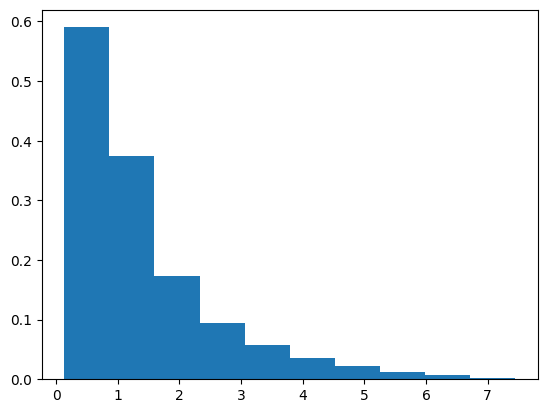

In [24]:
plt.hist(samples_bbh['snr_img1']/samples_bbh['snr_img2'],density=True)

In [2]:
#samples_bbh.to_csv('samples_bbh.csv')

# Read snr computed bbh dataset

In [3]:
samples_bbh = pd.read_csv('samples_bbh_with_snrs_O4.csv',index_col = 0)

In [4]:
samples_bbh

mass_ratio  chirp_mass  luminosity_distance       dec        ra  \
0        0.828646   15.806466          3732.492874  0.784701  3.769071   
1        0.897477   81.743777          2679.421785 -0.397245  2.962806   
2        0.601453    9.364217          3975.861855  0.738599  5.666779   
3        0.746815  102.503304          4370.653095  0.120159  0.055401   
4        0.763504  103.000190          3361.632765 -0.216309  3.141295   
...           ...         ...                  ...       ...       ...   
99995    0.566962   93.843517          4285.051583 -0.542282  3.206926   
99996    0.782646   97.014812          4215.307860 -0.027142  2.261796   
99997    0.779232   37.260389          4442.588601 -0.930439  4.853095   
99998    0.664114  110.612177          2228.894589 -0.828891  0.085773   
99999    0.973641  165.522055          4657.948399  0.537164  4.316822   

       theta_jn       psi     phase       a_1       a_2  ...   snr_img2  \
0      0.348763  2.290414  5.512332  0.957824  0.009734  ...  14.056024   
1      0.266923  2.325518  0.692068  0.026921  0.390545  ...  16.171655   
2      2.387750  0.100437  0.988469  0.204101  0.744710  ...   5.006108   
3      1.594969  1.924466  3.365458  0.356015  0.757097  ...   9.014001   
4      2.411420  0.278987  0.131624  0.955969  0.179181  ...  17.935776   
...         ...       ...       ...       ...       ...  ...        ...   
99995  1.746603  1.462154  3.855831  0.512018  0.432121  ...   8.899109   
99996  1.382425  0.005951  2.151546  0.605241  0.283334  ...  18.444914   
99997  0.899502  0.702237  5.150744  0.354371  0.423673  ...   5.481387   
99998  2.657096  0.254665  5.474168  0.247773  0.625146  ...  23.649203   
99999  0.909934  2.129336  0.494406  0.368619  0.861407  ...  13.720642   

       total_mass      mass_1      mass_2  geocent_time  geocent_time_img1  \
0       36.506393   19.963614   16.542778  1.247704e+09       1.264040e+09   
1      188.127605   99.146179   88.981427  1.266802e+09       1.252901e+09   
2       22.354628   13.958963    8.395665  1.257453e+09       1.253603e+09   
3      238.509867  136.539872  101.969995  1.261442e+09       1.265421e+09   
4      239.223031  135.652126  103.570905  1.244908e+09       1.247867e+09   
...           ...         ...         ...           ...                ...   
99995  226.121637  144.305799   81.815838  1.242118e+09       1.245486e+09   
99996  224.893536  126.157180   98.736356  1.264232e+09       1.255687e+09   
99997   86.402521   48.561693   37.840829  1.253214e+09       1.243387e+09   
99998  260.541603  156.564797  103.976806  1.253240e+09       1.254333e+09   
99999  380.310525  192.694842  187.615683  1.267487e+09       1.248384e+09   

       geocent_time_img2     snr H1     snr L1     snr V1  
0           1.247495e+09   5.862062   6.047197   1.970895  
1           1.239880e+09  14.775134   3.402934  10.380379  
2           1.239722e+09   2.003969   2.333120   1.758856  
3           1.255542e+09   4.271129   4.884194   2.948093  
4           1.241682e+09  13.172282  12.185999   5.600812  
...                  ...        ...        ...        ...  
99995       1.263115e+09   3.079797   4.651808   6.871107  
99996       1.255150e+09   4.862157   7.541261   1.267103  
99997       1.238431e+09   4.812452   3.082338   2.036171  
99998       1.245737e+09  21.639728  14.073619  11.205059  
99999       1.255506e+09   8.194030   9.415702   4.204925  

[100000 rows x 26 columns]

In [5]:
samples_bbh.columns

Index(['mass_ratio', 'chirp_mass', 'luminosity_distance', 'dec', 'ra',
       'theta_jn', 'psi', 'phase', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12',
       'phi_jl', 'snr_ul', 'snr_img1', 'snr_img2', 'total_mass', 'mass_1',
       'mass_2', 'geocent_time', 'geocent_time_img1', 'geocent_time_img2',
       'snr H1', 'snr L1', 'snr V1'],
      dtype='object')

(array([0.5908683 , 0.3741061 , 0.17012511, 0.09472007, 0.05641737,
        0.03573828, 0.02063817, 0.01249476, 0.00676572, 0.00218249]),
 array([0.1343542 , 0.86746174, 1.60056927, 2.33367681, 3.06678434,
        3.79989188, 4.53299942, 5.26610695, 5.99921449, 6.73232202,
        7.46542956]),
 <BarContainer object of 10 artists>)

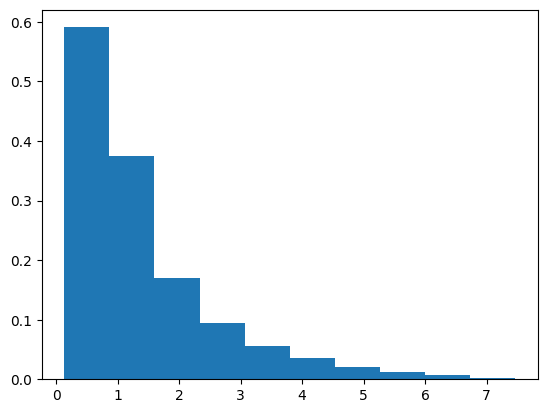

In [6]:
plt.hist(samples_bbh['snr_img1']/samples_bbh['snr_img2'],density=True)

## prepare various injection sets:-

1. unlensed H1 : n events -> n(n-1)/2 pairs
2. unlensed L1 : 
3. unlensed V1 :

--

1. lensed H1 : n events -> n pairs
2. lensed L1 :
3. lensed V1 :


tf.tensor

In [7]:
samples_bbh.columns

Index(['mass_ratio', 'chirp_mass', 'luminosity_distance', 'dec', 'ra',
       'theta_jn', 'psi', 'phase', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12',
       'phi_jl', 'snr_ul', 'snr_img1', 'snr_img2', 'total_mass', 'mass_1',
       'mass_2', 'geocent_time', 'geocent_time_img1', 'geocent_time_img2',
       'snr H1', 'snr L1', 'snr V1'],
      dtype='object')

In [8]:
def conv_bilby_to_pycbc(bilby_params_df, name_dict={'mass_1':'mass_1','mass_2':'mass_2','geocent_time':'geocent_time','luminosity_distance':'luminosity_distance','ra':'ra','dec':'dec','phase':'phase','psi':'psi'}):
    
    #name_dict={'mass_1':'m1','mass_2':'m2','geocent_time':'t0','luminosity_distance':'dist','ra':'ra','dec':'dec','phase':'phi0','psi':'pol'}
    #name_dict={'mass_1':'m1z','mass_2':'m2z','geocent_time':'tc','luminosity_distance':'ldistance','ra':'ra','dec':'dec','phase':'phi0','psi':'pol'}
    pycbc_params_dict = {}
    for key in name_dict.keys():
        pycbc_params_dict[name_dict[key]]= bilby_params_df[key].values
    cols = ['theta_jn','phi_jl','tilt_1','tilt_2','phi_12','a_1','a_2','mass_1','mass_2','phase']
    theta_jn, phi_jl, tilt_1, tilt_2, phi_12, a_1, a_2, mass_1, mass_2, phase=bilby_params_df[cols].T.values
    
    out = [bilby.gw.conversion.bilby_to_lalsimulation_spins\
    (theta_jn[i], phi_jl[i], tilt_1[i], tilt_2[i], phi_12[i], a_1[i], a_2[i], mass_1[i], mass_2[i], 20, phase[i]) for i in range(len(mass_1))]
    pycbc_params_dict['theta_jn'],pycbc_params_dict['spin_1x'], pycbc_params_dict['spin_1y'], pycbc_params_dict['spin_1z'], pycbc_params_dict['spin_2x'], pycbc_params_dict['spin_2y'], pycbc_params_dict['spin_2z'] = np.array(out).T
    return pycbc_params_dict


In [9]:
conv_bilby_to_pycbc(samples_bbh[:5])

{'mass_1': array([ 19.96361444,  99.14617868,  13.95896309, 136.5398722 ,
        135.65212576]),
 'mass_2': array([ 16.54277812,  88.98142659,   8.39566539, 101.96999508,
        103.57090525]),
 'geocent_time': array([1.24770432e+09, 1.26680194e+09, 1.25745296e+09, 1.26144220e+09,
        1.24490783e+09]),
 'luminosity_distance': array([3732.49287403, 2679.42178513, 3975.8618553 , 4370.65309455,
        3361.632765  ]),
 'ra': array([3.76907093, 2.96280648, 5.66677878, 0.05540112, 3.14129498]),
 'dec': array([ 0.78470073, -0.3972451 ,  0.73859933,  0.12015874, -0.2163086 ]),
 'phase': array([5.51233205, 0.69206793, 0.98846876, 3.36545824, 0.13162406]),
 'psi': array([2.29041449, 2.32551844, 0.10043741, 1.92446555, 0.27898674]),
 'theta_jn': array([0.34876261, 0.2669226 , 2.38774959, 1.59496909, 2.41142043]),
 'spin_1x': array([-0.82479784,  0.00344122,  0.17458432, -0.1385378 , -0.91881172]),
 'spin_1y': array([ 0.20647884,  0.00879144,  0.03522918,  0.27047224, -0.26025379]),
 'spin

### unlensed set

In [10]:
si,ei=0,2000
# save snr_H, snr_L, snr_V uniform .npz files
unlensed_injs=conv_bilby_to_pycbc(samples_bbh[si:ei])
unlensed_injs['snr'] = samples_bbh['snr_ul'].values[si:ei]

In [11]:
unlensed_injs['event_tag'] = np.arange(si,ei)

In [12]:
unlensed_injs_H,unlensed_injs_L,unlensed_injs_V=deepcopy(unlensed_injs),deepcopy(unlensed_injs),deepcopy(unlensed_injs)

unlensed_injs_H['luminosity_distance'] = unlensed_injs['luminosity_distance']*samples_bbh['snr H1'].values[si:ei]/unlensed_injs['snr']
unlensed_injs_L['luminosity_distance'] = unlensed_injs['luminosity_distance']*samples_bbh['snr L1'].values[si:ei]/unlensed_injs['snr']
unlensed_injs_V['luminosity_distance'] = unlensed_injs['luminosity_distance']*samples_bbh['snr V1'].values[si:ei]/unlensed_injs['snr']

In [13]:
unlensed_injs_H['luminosity_distance']

array([2181.23773359, 9785.48220279,  336.37516458, ..., 3413.34507978,
       2708.72673731, 1650.05068106])

In [14]:
np.savez('data/uniform_unlensed_injs_H.npz',**unlensed_injs_H)
np.savez('data/uniform_unlensed_injs_L.npz',**unlensed_injs_L)
np.savez('data/uniform_unlensed_injs_V.npz',**unlensed_injs_V)

### lensed set

In [15]:
# save snr_H pairs, snr_L pairs, snr_V pairs .npz files.

In [16]:
si,ei = 2000,int(1e5)

In [17]:
lensed_injs=conv_bilby_to_pycbc(samples_bbh[si:ei])
lensed_injs['event_tag'] = np.arange(si,ei)
size=len(lensed_injs['event_tag'])
lensed_injs['img_tag'] = np.vstack([np.zeros(size),np.ones(size)]).T.astype(int)

In [18]:
tc1=lensed_injs['geocent_time']
tc2=lensed_injs['geocent_time']+24*3600*np.random.rand(size)
lensed_injs['geocent_time'] = np.vstack([tc1,tc2]).T
lensed_injs['snr'] = samples_bbh[['snr_img1','snr_img2']].values[si:ei,:]
lensed_injs['luminosity_distance'] = np.vstack([lensed_injs['luminosity_distance'],lensed_injs['luminosity_distance']]).T



In [19]:
lensed_injs['snr']

array([[ 4.67484823, 11.14332215],
       [12.91795139,  4.92062713],
       [23.19242357, 23.03792416],
       ...,
       [25.41539696,  5.48138728],
       [ 7.20011435, 23.64920317],
       [ 6.57422886, 13.72064206]])

In [20]:
lensed_injs_H,lensed_injs_L,lensed_injs_V=deepcopy(lensed_injs),deepcopy(lensed_injs),deepcopy(lensed_injs)

In [21]:
lensed_injs['luminosity_distance']

array([[4196.20518228, 4196.20518228],
       [4570.05174666, 4570.05174666],
       [4810.35591467, 4810.35591467],
       ...,
       [4442.58860139, 4442.58860139],
       [2228.89458949, 2228.89458949],
       [4657.94839853, 4657.94839853]])

In [22]:
for i in range(2):
    lensed_injs_H['luminosity_distance'][:,i] = lensed_injs_H['luminosity_distance'][:,i]*samples_bbh['snr H1'].values[si:ei]/lensed_injs['snr'][:,i]
    lensed_injs_L['luminosity_distance'][:,i] = lensed_injs_L['luminosity_distance'][:,i]*samples_bbh['snr L1'].values[si:ei]/lensed_injs['snr'][:,i]
    lensed_injs_V['luminosity_distance'][:,i] = lensed_injs_V['luminosity_distance'][:,i]*samples_bbh['snr V1'].values[si:ei]/lensed_injs['snr'][:,i]

In [23]:
lensed_injs_L['luminosity_distance'][:,0]/lensed_injs_L['luminosity_distance'][:,1]

array([2.38367571, 0.38091389, 0.99333837, ..., 0.21567191, 3.28455938,
       2.08703444])

In [24]:
lensed_injs_L['snr'][:,1]/lensed_injs_L['snr'][:,0]

array([2.38367571, 0.38091389, 0.99333837, ..., 0.21567191, 3.28455938,
       2.08703444])

In [25]:
#np.savez('data/uniform_lensed_injs_H.npz',**lensed_injs_H)
#np.savez('data/uniform_lensed_injs_L.npz',**lensed_injs_L)
#np.savez('data/uniform_lensed_injs_V.npz',**lensed_injs_V)

In [116]:
### change mode in injection data generation: single detector datagen.

### train single densenet on H, L, V detectors: with uniform in SNR.

# test on individual.

## convert old injection parameters according to new naming conventions

In [138]:
name_dict_l={'mass_1':'m1','mass_2':'m2','geocent_time':'t0','luminosity_distance':'dist','phase':'phi0','psi':'pol','theta_jn':'incl'}
name_dict_ul={'mass_1':'m1z','mass_2':'m2z','geocent_time':'tc','luminosity_distance':'ldistance','phase':'phi0','psi':'pol','theta_jn':'iota'}
    
name_dict_l_rev=dict(zip(name_dict_l.values(),name_dict_l.keys()))
name_dict_ul_rev=dict(zip(name_dict_ul.values(),name_dict_ul.keys()))

In [8]:
#infile_ul='/home/srashti.goyal/lensid/data/injection_pars/O3a/injections_samples_o3a_newrun_Belczynski_image1_LHV_withsnr_filtered.npz'
#infile_l= '/home/srashti.goyal/lensid/data/injection_pars/haris-et-al/lensed_inj_data.npz'
#infile_ul= '/home/srashti.goyal/lensid/data/injection_pars/haris-et-al/unlensed_inj_data.npz'
infile_l='/home/srashti.goyal/lensid/data/injection_pars/training/dominik_plaw2_lensed_inj_params_include_pol_phi0_refined.npz'
infile_ul='/home/srashti.goyal/lensid/data/injection_pars/training/analytical_psd_Dominik_powerlaw2_inj_samples_withsnr_refined.npz'



In [158]:
data_ul =dict(np.load(infile_ul))

data_l =dict(np.load(infile_l))


In [159]:
data_ul.keys()

dict_keys(['event_tag', 'm1z', 'ldistance', 'm2z', 'ra', 'dec', 'iota', 'a_1 ', 'a_2 ', 'tilt_1', 'tilt_2', 'phi_jl', 'phi_12', 'pol', 'phi0', 'tc', 'f_ref', 'snr'])

In [160]:
for oldkey in name_dict_l_rev.keys():
    print(oldkey)
    data_l[name_dict_l_rev[oldkey]] = data_l[oldkey]
    del data_l[oldkey]

m1
m2
t0
dist
phi0
pol
incl


In [161]:
for oldkey in name_dict_ul_rev.keys():
    print(oldkey)
    data_ul[name_dict_ul_rev[oldkey]] = data_ul[oldkey]
    del data_ul[oldkey]

m1z
m2z
tc
ldistance
phi0
pol
iota


In [162]:
for col in ['spin_1x','spin_1y','spin_1z','spin_2x','spin_2y','spin_2z']:
    data_l[col] = np.zeros(len(data_l['mass_1']))
    data_ul[col] = np.zeros(len(data_ul['mass_1']))

In [163]:
np.savez(infile_ul[:-4]+'_converted',**data_ul)
np.savez(infile_l[:-4]+'_converted',**data_l)

In [9]:
data_ul =dict(np.load(infile_ul[:-4]+'_converted.npz'))

data_l =dict(np.load(infile_l[:-4]+'_converted.npz'))

In [10]:
data_ul.keys()

dict_keys(['z', 'ra', 'dec', 's1x', 's1y', 's1z', 's2x', 's2y', 's2z', 'snr', 'event_tag', 'mass_1', 'mass_2', 'geocent_time', 'luminosity_distance', 'phase', 'psi', 'theta_jn', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y', 'spin_2z'])

In [11]:
data_l.keys()

dict_keys(['ra', 'dec', 'event_tag', 'img_tag', 'mass_1', 'mass_2', 'geocent_time', 'luminosity_distance', 'phase', 'psi', 'theta_jn', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y', 'spin_2z'])

In [ ]:
#nohup lensid_create_qts_lensed_injs -odir ~/lensid_runs/uniform_dataset  -infile ~/lensid/development/trainingset_prep_unbiased/data/uniform_lensed_injs_V.npz -single_det V1 -psd_mode 2 -asd_dir ~/lensid/data/PSDs/O4_projected/ -whitened 1 >~/b.out &
#nohup lensid_create_qts_unlensed_injs -odir ~/lensid_runs/uniform_dataset  -infile ~/lensid/development/trainingset_prep_unbiased/data/uniform_unlensed_injs_V.npz -single_det V1 -psd_mode 2 -asd_dir ~/lensid/data/PSDs/O4_projected/ -whitened 1 >~/a.out &


In [6]:
data_o4_l=dict(np.load('/home/srashti.goyal/lensid/data/injection_pars/O4/sim_O4_15_oct_lensed_dets.npz',allow_pickle=True))



In [7]:
data_o4_l.keys()

dict_keys(['mass_1s', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'theta_jn', 'psi', 'ra', 'dec', 'z', 'comoving_distance', 'a_1', 'a_2', 'mass_ratio', 'mass_2s', 'mass_1', 'mass_2', 'no. detected images', 'snr H1', 'snr L1', 'snr V1', 'phase', 'geocent_time', 'luminosity_distance', 'event_tag', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y', 'spin_2z'])

# convert to h5 files

In [2]:
import matplotlib.pylab as plt
import numpy as np
import os
import argparse
import glob
import cv2
# nohup lensid_png_to_npz -indir /home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/qts/train/V1/ -outdir /home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/qts/train/npz/V1/ >a.out &

In [ ]:
indir = '/home/srashti.goyal/lensid_runs/uniform_dataset/H1/'
outdir = '/home/srashti.goyal/lensid_runs/uniform_dataset/npz/H1/'
if os.path.exists(outdir)==0:
    os.makedirs(outdir)
force = 1
path = indir+'*.png'
files = glob.glob(path)
print('converting %d files to npz '%len(files))
in_channel = 3
    # height and width
img_rows, img_cols = 128, 128





converting 198000 files to npz 


In [ ]:
def _main(filename1, out_filename1, force=0):
    if (os.path.isfile(filename1) == 1):
        # print(out_filename1)
        if (os.path.isfile(out_filename1) != 1) or (force == 1):
                img = cv2.imread(filename1)
                img = cv2.resize(img, (img_rows, img_cols))
                np.savez(out_filename1,data=img)


In [5]:
i=1

filename=files[i]
out_filename1=outdir+filename1.split('/')[-1][:-4] + '.npz'
_main(filename1, out_filename1, force)



NameError: name 'filename1' is not defined

In [6]:
_main=np.vectorize(_main)

In [7]:
filenames=files[:10]
out_filenames=[outdir+filename1.split('/')[-1][:-4] + '.npz' for filename1 in filenames]

In [8]:
_main(filenames,out_filenames)

array([None, None, None, None, None, None, None, None, None, None],
      dtype=object)

In [13]:
#glob.glob(outdir+'*')

In [10]:
import time


In [56]:
st=time.time()
data1 = [np.load(out_filenames[i],'r')['data'] for i in range(10)]
et=time.time()
print(et-st)

0.014199256896972656


In [69]:
st=time.time()
data = [cv2.imread(filenames[i],1) for i in range(10)]
et=time.time()
print(et-st)

0.040209293365478516


In [70]:
data.shape

AttributeError: 'list' object has no attribute 'shape'

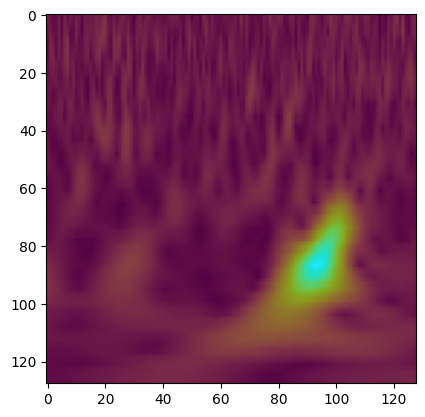

In [71]:

plt.imshow(cv2.resize(data[4],(128,128)),cmap='gray')

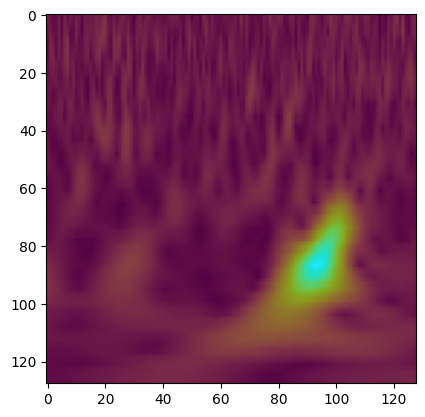

In [59]:
plt.imshow(data1[4],cmap='gray')

In [25]:
data[1].shape

(308, 542, 3)

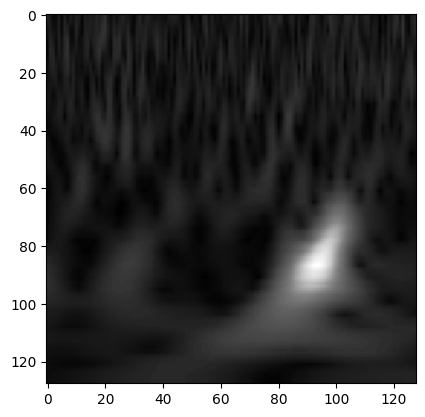

In [63]:
greyed=cv2.cvtColor(data1[4], cv2.COLOR_BGR2GRAY)
plt.imshow(greyed,cmap='gray')


In [67]:
greyed.max()

215

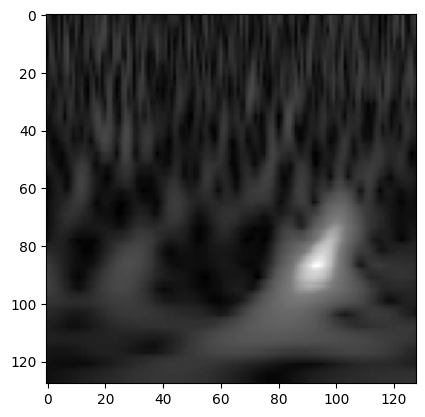

In [68]:
plt.imshow(data1[4].sum(axis=2),cmap='gray')

In [75]:
np.zeros([3,2,0])

array([], shape=(3, 2, 0), dtype=float64)

# O4 lensed injection create Dataframes

In [12]:
in_df= '/home/srashti.goyal/lensid/data/injection_pars/O4/sim_O4_15_oct_lensed_dets_df.csv'


In [15]:
in_df=pd.read_csv(in_df,index_col=0)

In [16]:
in_df.columns

Index(['mass_1s', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'theta_jn', 'psi',
       'ra', 'dec', 'z', 'comoving_distance', 'a_1', 'a_2', 'mass_ratio',
       'mass_2s', 'mass_1', 'mass_2', 'no. detected images', 'snr H1',
       'snr L1', 'snr V1', 'phase', 'geocent_time', 'luminosity_distance',
       'event_tag', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y',
       'spin_2z'],
      dtype='object')

In [20]:
detectable_pairs=in_df[in_df['no. detected images']==2].reset_index(drop=True)

In [21]:
detectable_pairs

mass_1s    tilt_1    tilt_2    phi_12    phi_jl  theta_jn       psi  \
0      8.858232  0.745459  1.790450  4.392759  5.011517  0.717764  0.072631   
1      8.858232  0.745459  1.790450  4.392759  5.011517  0.717764  0.072631   
2      6.626747  0.838856  1.040546  2.639885  4.794596  0.617125  1.081096   
3      6.626747  0.838856  1.040546  2.639885  4.794596  0.617125  1.081096   
4     27.463892  1.151337  1.584032  1.888398  3.446022  1.774954  0.266437   
...         ...       ...       ...       ...       ...       ...       ...   
4243  32.800757  1.098930  1.520744  3.141376  4.080390  1.503258  0.848252   
4244  59.078193  0.291356  0.770607  2.788128  0.317379  0.159518  1.642959   
4245  59.078193  0.291356  0.770607  2.788128  0.317379  0.159518  1.642959   
4246  33.153458  0.689950  1.811947  1.323541  3.477922  2.472002  1.812986   
4247  33.153458  0.689950  1.811947  1.323541  3.477922  2.472002  1.812986   

            ra       dec     z  ...     phase  geocent_time  \
0     3.312336  0.377153  0.84  ...  2.503379  1.233382e+09   
1     3.312336  0.377153  0.84  ...  4.074176  1.233399e+09   
2     0.421285 -0.860716  1.63  ...  0.954549  1.255010e+09   
3     0.421285 -0.860716  1.63  ...  2.525345  1.255010e+09   
4     0.118099  0.013910  1.35  ...  4.187552  1.242936e+09   
...        ...       ...   ...  ...       ...           ...   
4243  5.036385  0.484863  0.79  ...  6.355456  1.273287e+09   
4244  2.835248 -0.512088  1.71  ...  1.726901  1.257129e+09   
4245  2.835248 -0.512088  1.71  ...  3.297698  1.272311e+09   
4246  2.493953  0.995098  0.28  ...  4.401106  1.266864e+09   
4247  2.493953  0.995098  0.28  ...  5.971902  1.270040e+09   

      luminosity_distance              event_tag   spin_1x   spin_1y  \
0             1787.931108     event_0_img_0_of_2  0.050527  0.043564   
1             1869.144215     event_0_img_1_of_2  0.043564 -0.050527   
2             1835.049594     event_7_img_0_of_2  0.280904  0.229851   
3             1845.730988     event_7_img_1_of_2  0.229851 -0.280904   
4             2094.302540     event_9_img_0_of_2 -0.050402  0.088350   
...                   ...                    ...       ...       ...   
4243          4047.248439  event_2930_img_1_of_2 -0.152002 -0.179498   
4244         10003.366441  event_2931_img_0_of_2  0.003800  0.110498   
4245         14080.486521  event_2931_img_1_of_2  0.110498 -0.003800   
4246           964.574809  event_2932_img_0_of_2 -0.107478  0.220342   
4247          1550.836939  event_2932_img_1_of_2  0.220342  0.107478   

       spin_1z   spin_2x   spin_2y   spin_2z  
0     0.072268  0.053068 -0.128408 -0.031020  
1     0.072268 -0.128408 -0.053068 -0.031020  
2     0.326088 -0.012055 -0.002244  0.007189  
3     0.326088 -0.002244  0.012055  0.007189  
4     0.045357 -0.030437 -0.033686 -0.000601  
...        ...       ...       ...       ...  
4243  0.120032  0.178602  0.210817  0.013841  
4244  0.368679 -0.109435 -0.267873  0.298054  
4245  0.368679 -0.267873  0.109435  0.298054  
4246  0.297069 -0.214914 -0.045037 -0.054003  
4247  0.297069 -0.045037  0.214914 -0.054003  

[4248 rows x 31 columns]

In [24]:
in_df['event_tag']

0          event_0_img_0_of_2
1          event_0_img_1_of_2
2          event_1_img_0_of_4
3          event_1_img_1_of_4
4          event_1_img_2_of_4
                ...          
6923    event_2930_img_1_of_2
6924    event_2931_img_0_of_2
6925    event_2931_img_1_of_2
6926    event_2932_img_0_of_2
6927    event_2932_img_1_of_2
Name: event_tag, Length: 6928, dtype: object

In [25]:
detectable_pairs['event_tag']

0          event_0_img_0_of_2
1          event_0_img_1_of_2
2          event_7_img_0_of_2
3          event_7_img_1_of_2
4          event_9_img_0_of_2
                ...          
4243    event_2930_img_1_of_2
4244    event_2931_img_0_of_2
4245    event_2931_img_1_of_2
4246    event_2932_img_0_of_2
4247    event_2932_img_1_of_2
Name: event_tag, Length: 4248, dtype: object

In [49]:
#img_0=detectable_pairs['event_tag'][np.arange(0,len(detectable_pairs),2)].values
#img_1=detectable_pairs['event_tag'][np.arange(1,len(detectable_pairs),2)].values
img_0=in_df['event_tag'][in_df['event_tag'].str.contains("img_0")].values
img_1=in_df['event_tag'][in_df['event_tag'].str.contains("img_1")].values



In [50]:
lensing_pairs_df = pd.DataFrame()

In [51]:
lensing_pairs_df['img_0']=img_0
lensing_pairs_df['img_1']=img_1
lensing_pairs_df['Lensing']=1
lensing_pairs_df

img_0                  img_1  Lensing
0        event_0_img_0_of_2     event_0_img_1_of_2        1
1        event_1_img_0_of_4     event_1_img_1_of_4        1
2        event_2_img_0_of_3     event_2_img_1_of_3        1
3        event_3_img_0_of_4     event_3_img_1_of_4        1
4        event_4_img_0_of_4     event_4_img_1_of_4        1
...                     ...                    ...      ...
2928  event_2928_img_0_of_2  event_2928_img_1_of_2        1
2929  event_2929_img_0_of_2  event_2929_img_1_of_2        1
2930  event_2930_img_0_of_2  event_2930_img_1_of_2        1
2931  event_2931_img_0_of_2  event_2931_img_1_of_2        1
2932  event_2932_img_0_of_2  event_2932_img_1_of_2        1

[2933 rows x 3 columns]

In [52]:
lensing_pairs_df.to_csv('/home/srashti.goyal/lensid_runs/o4_ml2p0/data/dataframes/lensed_pairs.csv')

In [53]:
img_0=np.r_[img_0,in_df['event_tag'][in_df['event_tag'].str.contains("img_0_of_3")].values]
img_1=np.r_[img_1,in_df['event_tag'][in_df['event_tag'].str.contains("img_2_of_3")].values]

img_0=np.r_[img_0,in_df['event_tag'][in_df['event_tag'].str.contains("img_1_of_3")].values]
img_1=np.r_[img_1,in_df['event_tag'][in_df['event_tag'].str.contains("img_2_of_3")].values]

img_0=np.r_[img_0,in_df['event_tag'][in_df['event_tag'].str.contains("img_0_of_4")].values]
img_1=np.r_[img_1,in_df['event_tag'][in_df['event_tag'].str.contains("img_2_of_4")].values]

img_0=np.r_[img_0,in_df['event_tag'][in_df['event_tag'].str.contains("img_1_of_4")].values]
img_1=np.r_[img_1,in_df['event_tag'][in_df['event_tag'].str.contains("img_2_of_4")].values]


img_0=np.r_[img_0,in_df['event_tag'][in_df['event_tag'].str.contains("img_0_of_4")].values]
img_1=np.r_[img_1,in_df['event_tag'][in_df['event_tag'].str.contains("img_3_of_4")].values]

img_0=np.r_[img_0,in_df['event_tag'][in_df['event_tag'].str.contains("img_1_of_4")].values]
img_1=np.r_[img_1,in_df['event_tag'][in_df['event_tag'].str.contains("img_3_of_4")].values]


img_0=np.r_[img_0,in_df['event_tag'][in_df['event_tag'].str.contains("img_2_of_4")].values]
img_1=np.r_[img_1,in_df['event_tag'][in_df['event_tag'].str.contains("img_3_of_4")].values]






In [54]:
lensing_pairs_df = pd.DataFrame()
lensing_pairs_df['img_0']=img_0
lensing_pairs_df['img_1']=img_1
lensing_pairs_df['Lensing']=1
lensing_pairs_df

img_0                  img_1  Lensing
0        event_0_img_0_of_2     event_0_img_1_of_2        1
1        event_1_img_0_of_4     event_1_img_1_of_4        1
2        event_2_img_0_of_3     event_2_img_1_of_3        1
3        event_3_img_0_of_4     event_3_img_1_of_4        1
4        event_4_img_0_of_4     event_4_img_1_of_4        1
...                     ...                    ...      ...
5305  event_1550_img_2_of_4  event_1550_img_3_of_4        1
5306  event_1563_img_2_of_4  event_1563_img_3_of_4        1
5307  event_1564_img_2_of_4  event_1564_img_3_of_4        1
5308  event_1566_img_2_of_4  event_1566_img_3_of_4        1
5309  event_1577_img_2_of_4  event_1577_img_3_of_4        1

[5310 rows x 3 columns]

In [55]:
lensing_pairs_df.to_csv('/home/srashti.goyal/lensid_runs/o4_ml2p0/data/dataframes/lensed_all_pairs.csv')

# O4 unlensed 2 detector sets

In [69]:
data=dict(np.load('/home/srashti.goyal/lensid/data/injection_pars/O4/sim_O4_15_oct_unlensed_dets.npz'))
data.keys()


dict_keys(['Unnamed: 0', 'mass_1s', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'theta_jn', 'psi', 'ra', 'dec', 'phase', 'z', 'comoving_distance', 'luminosity_distance', 'geocent_time', 'a_1', 'a_2', 'mass_ratio', 'mass_2s', 'mass_1', 'mass_2', 'snr H1', 'snr L1', 'snr V1', 'is_detectable', 'coincs', 'network_snr', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y', 'spin_2z', 'event_tag'])

In [70]:
data['snr H1'].min()

0.8400544452497819

In [71]:
np.sqrt(data['snr H1']**2 + data['snr L1']**2 + data['snr V1']**2)

array([ 8.06257174, 12.44045108,  7.45918091, ...,  7.4806089 ,
        9.81497794,  6.47949406])

In [72]:
HL_ids=(data['snr H1']>4) * (data['snr L1'] > 4) * (np.sqrt(data['snr H1']**2 + data['snr L1']**2) > 7)

In [73]:
data_HL = pd.DataFrame(data)[HL_ids].reset_index(drop=True)

In [99]:
data_HL_dict=dict(zip(data_HL.columns.values,data_HL.values.T))
#np.savez('/home/srashti.goyal/lensid/data/injection_pars/O4/sim_O4_15_oct_unlensed_dets_HL_netsnr7.npz',**data_HL_dict)



(array([6773.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2395.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 10 artists>)

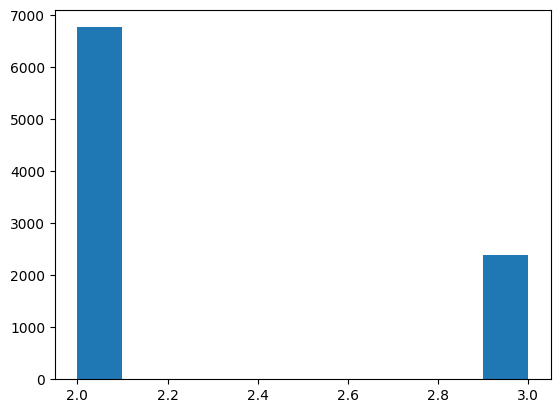

In [64]:
plt.hist(data_HL['coincs'])

In [ ]:
data_HL

In [65]:
o4a_det_df=pd.read_csv('/home/srashti.goyal/lensid_O4/data_download_preparation/O4a_events_data/events_info_df.csv')
o4a_det_df

Unnamed: 0      State      UID Pipeline       GPSTime           FAR  \
0            0  preferred  G407378    pycbc  1.368450e+09  3.218261e-10   
1            1  preferred  G407622     MBTA  1.368658e+09  3.060602e-09   
2            2  preferred  G407750   gstlal  1.368784e+09  1.035085e-08   
3            3  preferred  G407786   gstlal  1.368805e+09  6.479128e-09   
4            4  preferred  G407995    pycbc  1.368995e+09  7.224444e-08   
5            5  preferred  G408702    pycbc  1.369419e+09  1.975121e-10   
6            6  preferred  G409183    spiir  1.369695e+09  1.713566e-15   
7            7  preferred  G409693     MBTA  1.369983e+09  4.521287e-09   
8            8  preferred  G409791    pycbc  1.370047e+09  1.140317e-08   
9            9  preferred  G410337   gstlal  1.370293e+09  1.369214e-10   
10          10  preferred  G410430     MBTA  1.370329e+09  1.004153e-08   
11          11  preferred  G412745     MBTA  1.371480e+09  5.179556e-08   
12          12  preferred  G413097     MBTA  1.371641e+09  1.300185e-08   
13          13  preferred  G413615    pycbc  1.371866e+09  3.167546e-10   
14          14  preferred  G413960    pycbc  1.372029e+09  3.167546e-10   
15          15  preferred  G414254   gstlal  1.372165e+09  2.412787e-08   
16          16  preferred  G414341     MBTA  1.372204e+09  7.732377e-09   
17          17  preferred  G414699   gstlal  1.372359e+09  1.533217e-12   
18          18  preferred  G415010   gstlal  1.372472e+09  2.815523e-09   
19          19  preferred  G415531   gstlal  1.372675e+09  4.261356e-08   
20          20  preferred  G415815     MBTA  1.372769e+09  1.376458e-08   
21          21  preferred  G415992   gstlal  1.372830e+09  4.330932e-08   
22          22  preferred  G416015   gstlal  1.372836e+09  7.026288e-08   
23          23  preferred  G416134   gstlal  1.372872e+09  1.112553e-09   
24          24  preferred  G416203   gstlal  1.372893e+09  1.550344e-08   
25          25  preferred  G416372   gstlal  1.372941e+09  3.060765e-09   
26          26  preferred  G416775   gstlal  1.373158e+09  3.269085e-15   
27          27  preferred  G417598    spiir  1.373483e+09  7.843396e-09   
28          28  preferred  G419204     MBTA  1.374143e+09  5.330244e-08   
29          29  preferred  G419671   gstlal  1.374367e+09  3.832054e-14   
30          30  preferred  G420316   gstlal  1.374654e+09  3.393122e-09   
31          31  preferred  G420897    pycbc  1.374876e+09  3.167546e-10   
32          32  preferred  G421202   gstlal  1.375011e+09  2.227456e-08   
33          33  preferred  G421664    pycbc  1.375242e+09  9.185883e-09   
34          34  preferred  G422114   gstlal  1.375390e+09  2.958346e-09   
35          35  preferred  G422221   gstlal  1.375477e+09  7.141757e-08   
36          36  preferred  G428217    spiir  1.375697e+09  2.904612e-08   
37          37  preferred  G428324    pycbc  1.375759e+09  3.167546e-10   
38          38  preferred  G429159    spiir  1.376029e+09  4.810257e-08   
39          39  preferred  G429267   gstlal  1.376090e+09  1.846774e-21   

    NetworkSNR      H1SNR       Mass1       Mass2  ...     HasNS  HasRemnant  \
0    13.714781   9.942581   11.374062    1.243689  ...  1.000000    0.000000   
1    15.465648  10.445829   61.519232   39.008171  ...  0.000000    0.000000   
2    10.952271        NaN   67.469643   54.746231  ...  0.000000    0.000000   
3     8.343789        NaN   42.603889   40.860004  ...  0.000000    0.000000   
4     7.777772   4.862219    1.067567    1.029562  ...  1.000000    1.000000   
5    11.597271        NaN    5.930312    1.049427  ...  1.000000    0.120578   
6    13.049518   8.970583   97.242424   61.151516  ...  0.000000    0.000000   
7    11.195853   7.302712   20.833027   12.706301  ...  0.000000    0.000000   
8    11.330389   9.954044   60.675213   21.649523  ...  0.000000    0.000000   
9    10.226350   8.160816   76.482292   40.860004  ...  0.000000    0.000000   
10   10.429429   5.666230   47.358221   32.30492

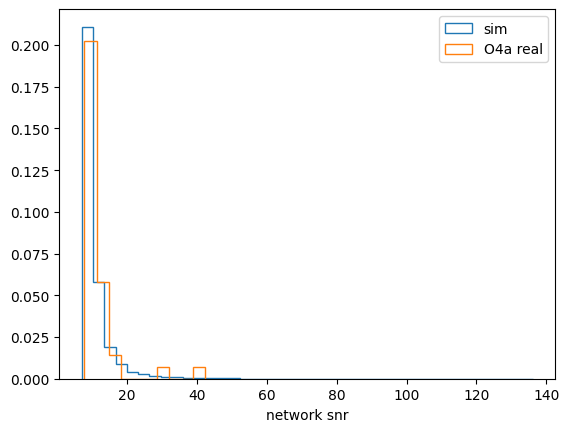

In [67]:
plt.hist(np.sqrt(data_HL['snr H1']**2 + data_HL['snr L1']**2),40,density=True,histtype='step',label='sim')
plt.hist(o4a_det_df['NetworkSNR'],10,density=True,histtype='step',label='O4a real')

plt.xlabel('network snr')
plt.legend()

plt.show()

In [55]:
o4a_det_df['NetworkSNR'].min()

7.777772486966355

In [59]:
o4a_det_df['H1SNR'].min()

2.2759051

In [165]:
check=dict(np.load('/home/srashti.goyal/lensid/data/injection_pars/O4/sim_O4_15_oct_unlensed_dets_HL_netsnr7.npz',allow_pickle=True))

In [166]:
check.keys()

dict_keys(['Unnamed: 0', 'mass_1s', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'theta_jn', 'psi', 'ra', 'dec', 'phase', 'z', 'comoving_distance', 'luminosity_distance', 'geocent_time', 'a_1', 'a_2', 'mass_ratio', 'mass_2s', 'mass_1', 'mass_2', 'snr H1', 'snr L1', 'snr V1', 'is_detectable', 'coincs', 'network_snr', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y', 'spin_2z', 'event_tag'])

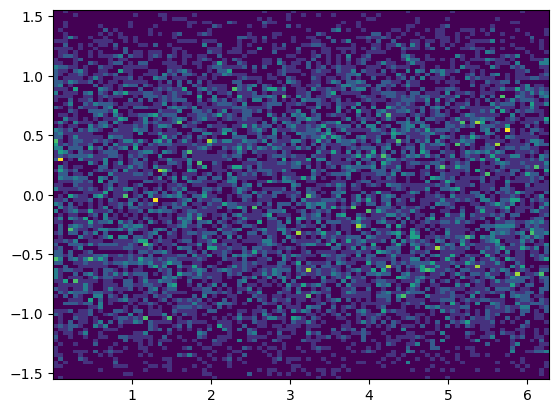

In [173]:
plt.hist2d(check['ra'],check['dec'],100)
plt.show()

In [105]:
check['mass_1'].shape

(9168,)

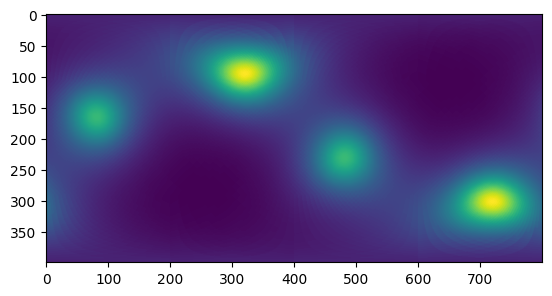

In [174]:
idx = 10
img=np.load('/home/srashti.goyal/lensid_runs/o4a_ml2p0_HL_sky/data/bayestar_skymaps/'+str(idx)+'.npz')
plt.imshow(img['data'])